In [12]:
from pathlib import Path
import pandas as pd
from pandas import CategoricalDtype
from plotnine import *
from rdkit.Chem import Descriptors, MolFromSmiles
from draw_data_distribution import plot_dis
from collections import Counter

- [RDKit|分子描述符计算与可视化](https://www.jianshu.com/p/880bb370eb4e)

In [3]:
DIR = Path('data/biocatalysis')
DATA = DIR / 'data.csv'
IMG_DIR = Path('imgs')

In [4]:
df = pd.read_csv(DATA, index_col=0)

In [5]:
df.head()

,reaction,photocatalyst,base,additive,solvent,time(h),yield/%,source,Unnamed: 8,Unnamed: 9,Unnamed: 10,base/acid,canonized_rxns,cat_class,base_class,additive_class,solvent_class
0,C=CC1=CC=CC=C1.FC([S+]2C3=C(C=CC=C3)C4=C2C=CC=...,fac-Ir(ppy)3,NaN,NaN,DCE,2.0,78,"Angew. Chem., Int. Ed., 2012, 51, 9567–9571",37.0,1.0,NaN,NaN,C=Cc1ccccc1.FC(F)(F)[s+]1c2ccccc2c2ccccc21.F[B...,1,0,0,5
1,C=CC1=CC=CC=C1.FC([S+]2C3=C(C=CC=C3)C4=C2C=CC=...,fac-Ir(ppy)3,NaN,NaN,DCE,2.0,75,"Angew. Chem., Int. Ed., 2012, 51, 9567–9571",37.0,2.0,NaN,NaN,C=Cc1ccccc1.FC(F)(F)[s+]1c2ccccc2c2ccccc21.F[B...,1,0,0,5
2,C=CC1=CC=CC=C1.FC([S+]2C3=C(C=CC=C3)C4=C2C=CC=...,fac-Ir(ppy)3,NaN,NaN,DCE,2.0,76,"Angew. Chem., Int. Ed., 2012, 51, 9567–9571",37.0,3.0,NaN,NaN,C=Cc1ccccc1.FC(F)(F)[s+]1c2ccccc2c2ccccc21.F[B...,1,0,0,5
3,C=CC1=CC=CC=C1.FC([S+]2C3=C(C=CC=C3)C4=C2C=CC=...,fac-Ir(ppy)3,NaN,NaN,DCE,2.0,84,"Angew. Chem., Int. Ed., 2012, 51, 9567–9571",37.0,4.0,NaN,NaN,C=Cc1ccccc1.FC(F)(F)[s+]1c2ccccc2c2ccccc21.F[B...,1,0,0,5
4,C=CC1=CC=CC=C1.FC([S+]2C3=C(C=CC=C3)C4=C2C=CC=...,fac-Ir(ppy)3,NaN,NaN,DCE,2.0,51,"Angew. Chem., Int. Ed., 2012, 51, 9567–9571",37.0,5.0,NaN,NaN,C=Cc1ccccc1.FC(F)(F)[s+]1c2ccccc2c2ccccc21.F[B...,1,0,0,5


In [6]:
def get_weight(rxn: str) -> float:
    mol = MolFromSmiles(rxn.split('>>')[1])
    return Descriptors.MolWt(mol)
def get_n_components(rxn: str) -> int:
    n_components = len((rxn.split('>>')[0].split('.')))
    if n_components >= 4:
        rtn = 4
    else:
        rtn = n_components
    return rtn

In [7]:
df['weight'] = df['canonized_rxns'].apply(get_weight)
df['n_components'] = df['canonized_rxns'].apply(get_n_components).astype(CategoricalDtype(categories=[3, 4, 2], ordered=True))

In [18]:
print(Counter(df['n_components']))
print(f"{433/(1915+3827+433)*100: .2f}%")
print(f"{3827/(1915+3827+433)*100: .2f}%")
print(f"{1915/(1915+3827+433)*100: .2f}%")

Counter({3: 3827, 4: 1915, 2: 433})
 7.01%
 61.98%
 31.01%


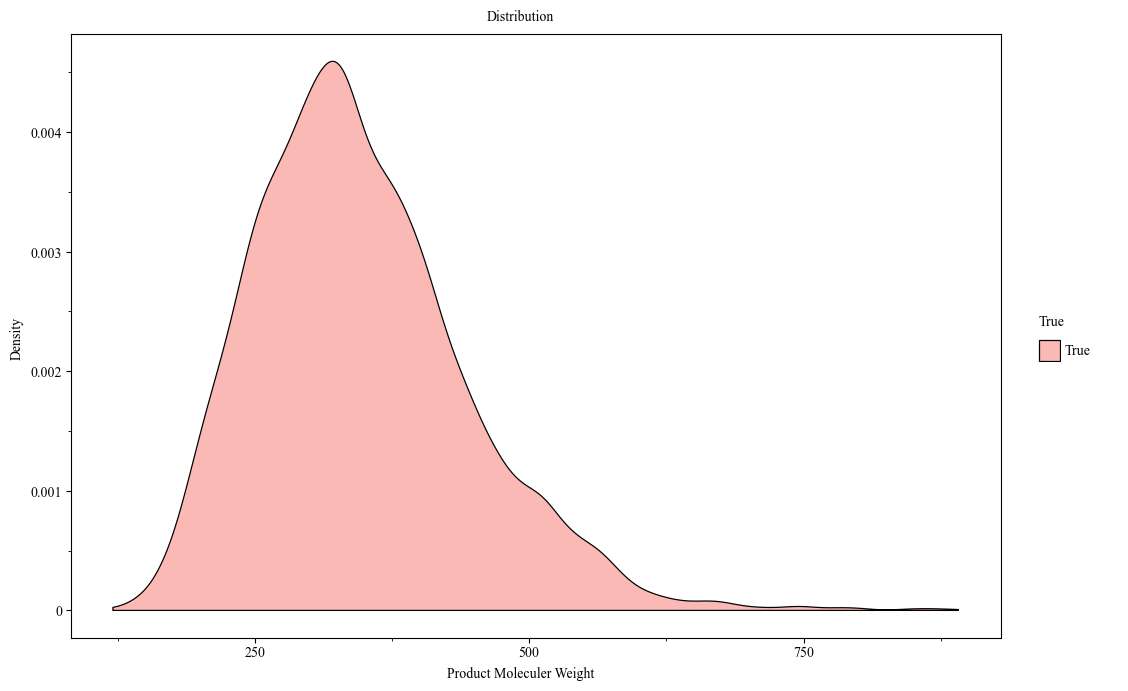

/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 12 x 8 in image.
/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: imgs/density.pdf


In [8]:
density_plot = (ggplot()
                + geom_density(aes(x="weight", fill=True), df, alpha=0.5, colour="black")
                + scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl')
                + theme_matplotlib()
                + xlab('Product Moleculer Weight')
                + ylab('Density')
                + ggtitle("Distribution")
                + theme(figure_size=(12,8))
                )
print(density_plot)
density_plot.save(IMG_DIR / 'density.pdf', dpi=250)

/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/z/projects/xjc/light/biocatalysisV6/draw_data_distribution.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
/z/projects/xjc/light/biocatalysisV6/draw_data_distribution.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
No artists with labels found to

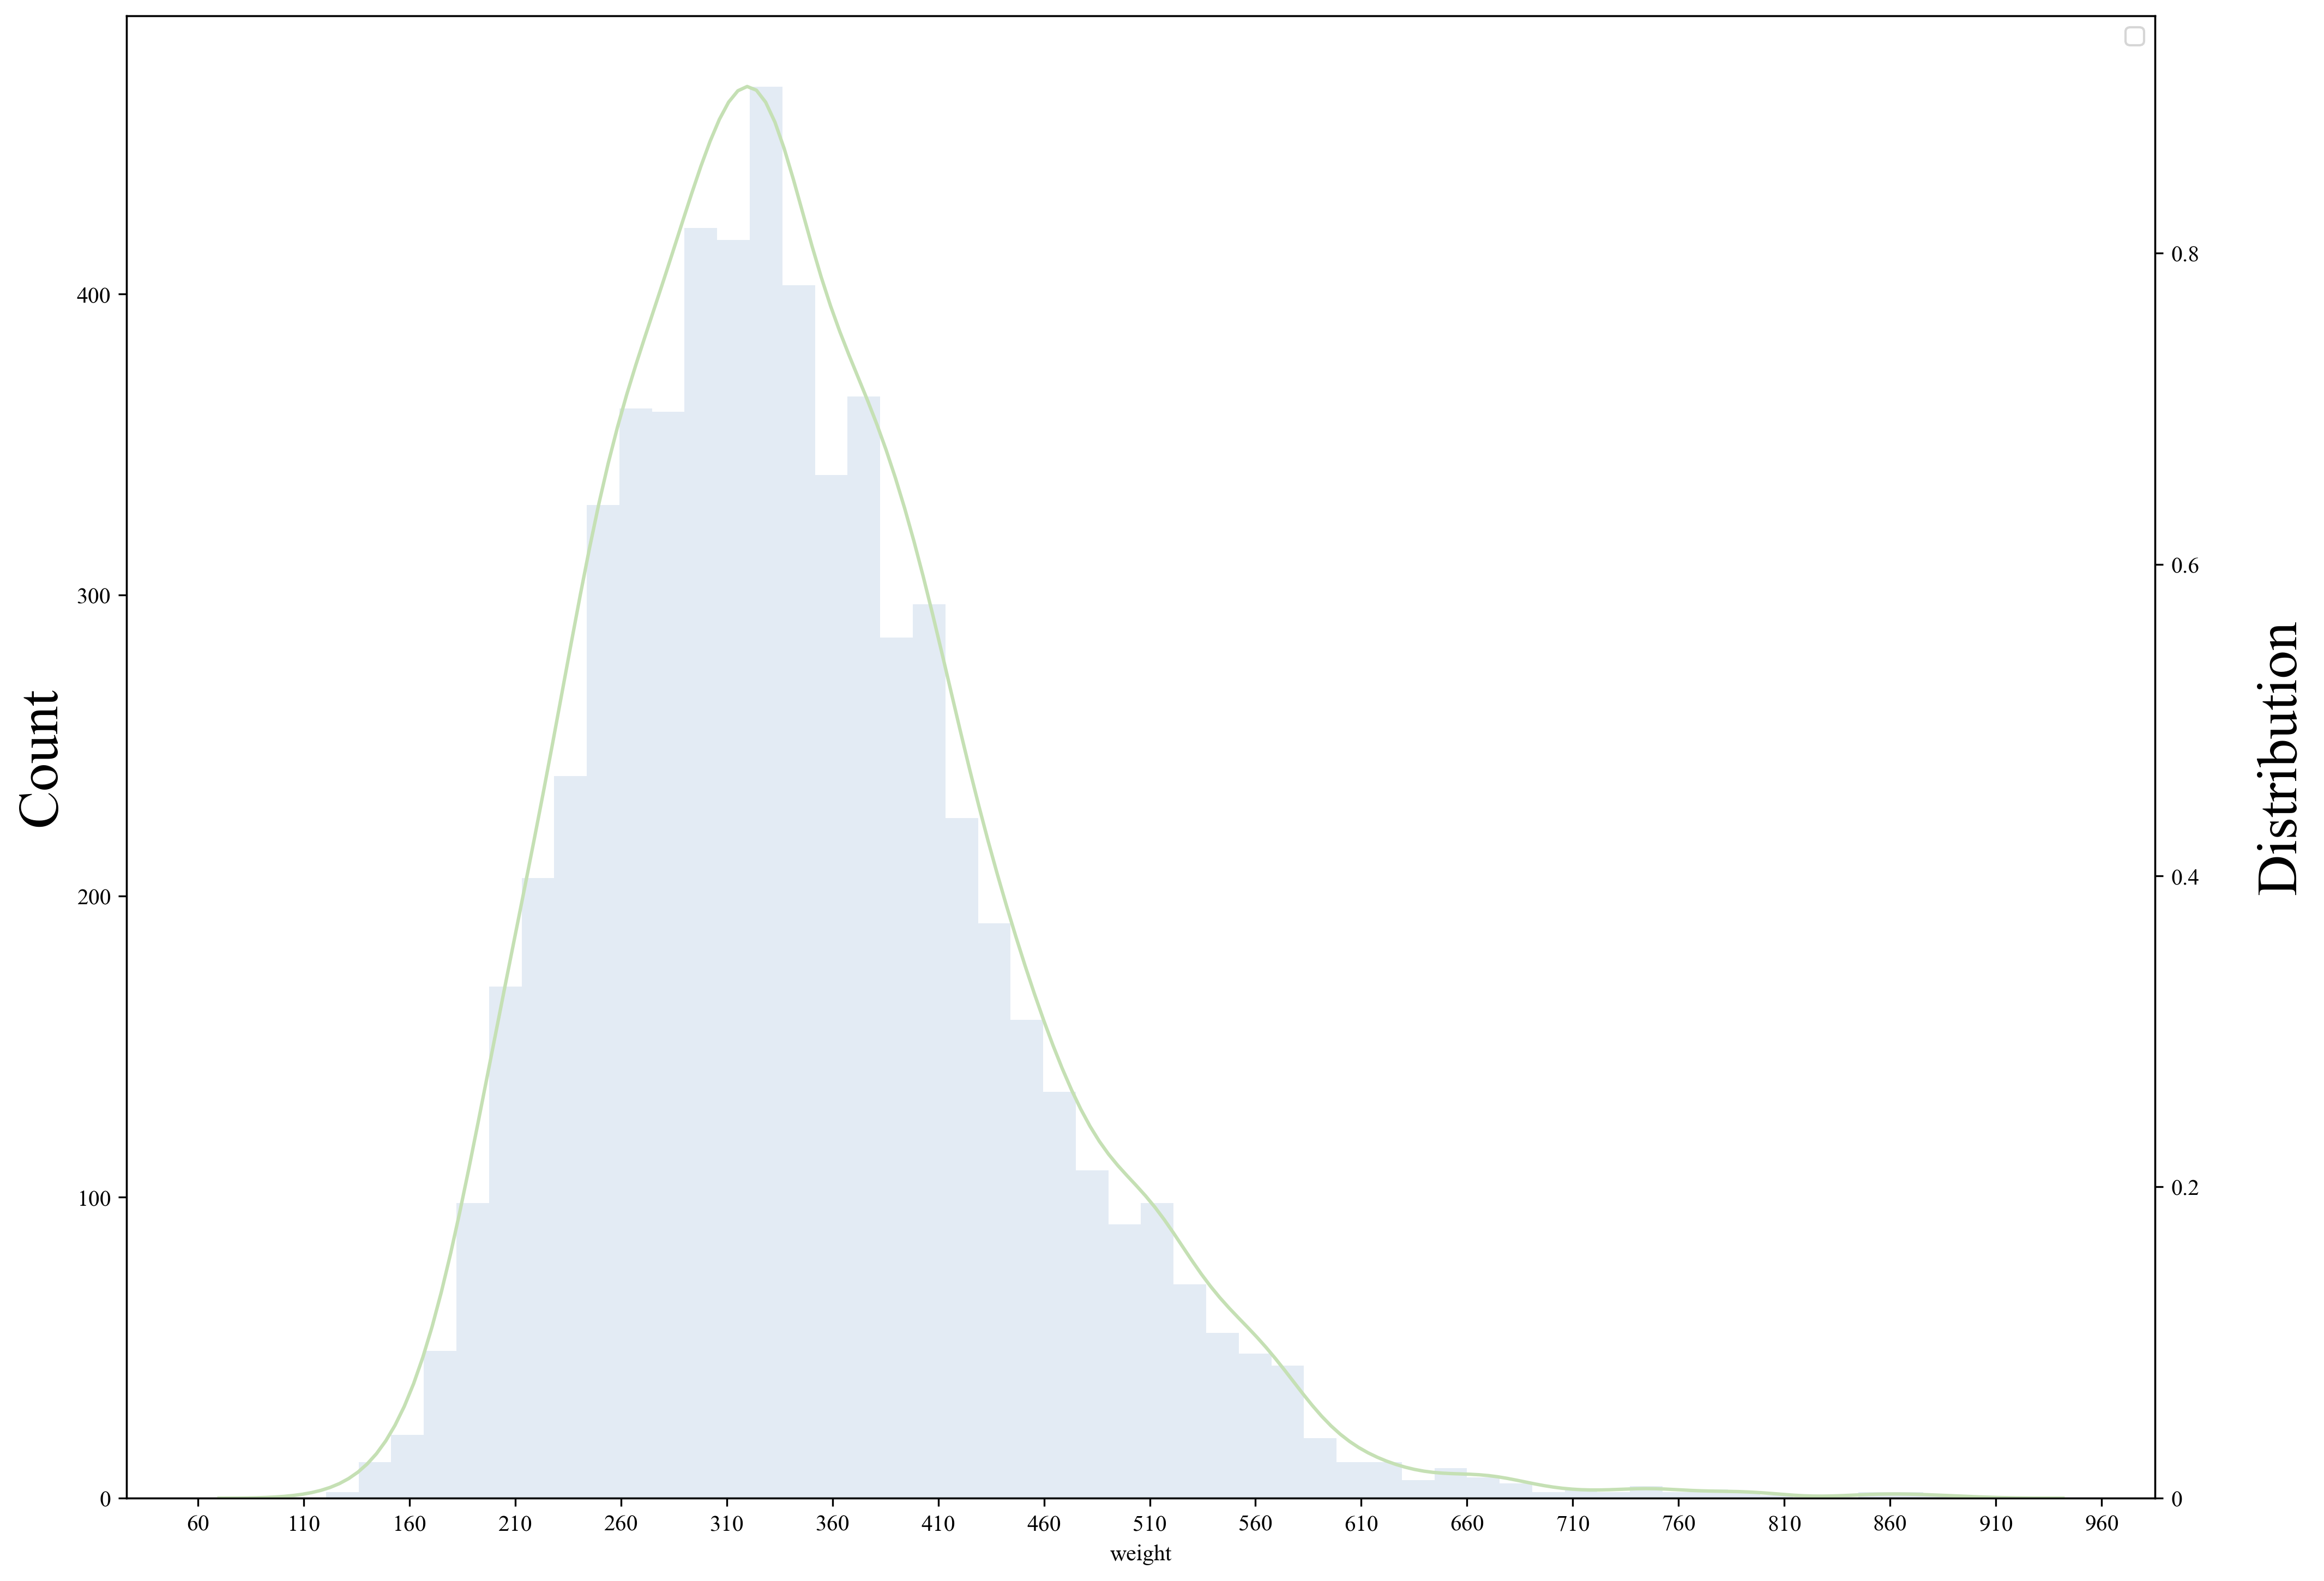

In [16]:
plot_dis(df, fontsize_big=25, fontsize_small=10)

In [10]:
def component_map(n: int):
    if n == 4:
        return 3
    else:
        return n
data = df[['weight', 'n_components']]
data['n_components_plus'] = data['n_components'].apply(component_map).astype(CategoricalDtype())

/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
data.dtypes

weight                float64
n_components         category
n_components_plus    category
dtype: object

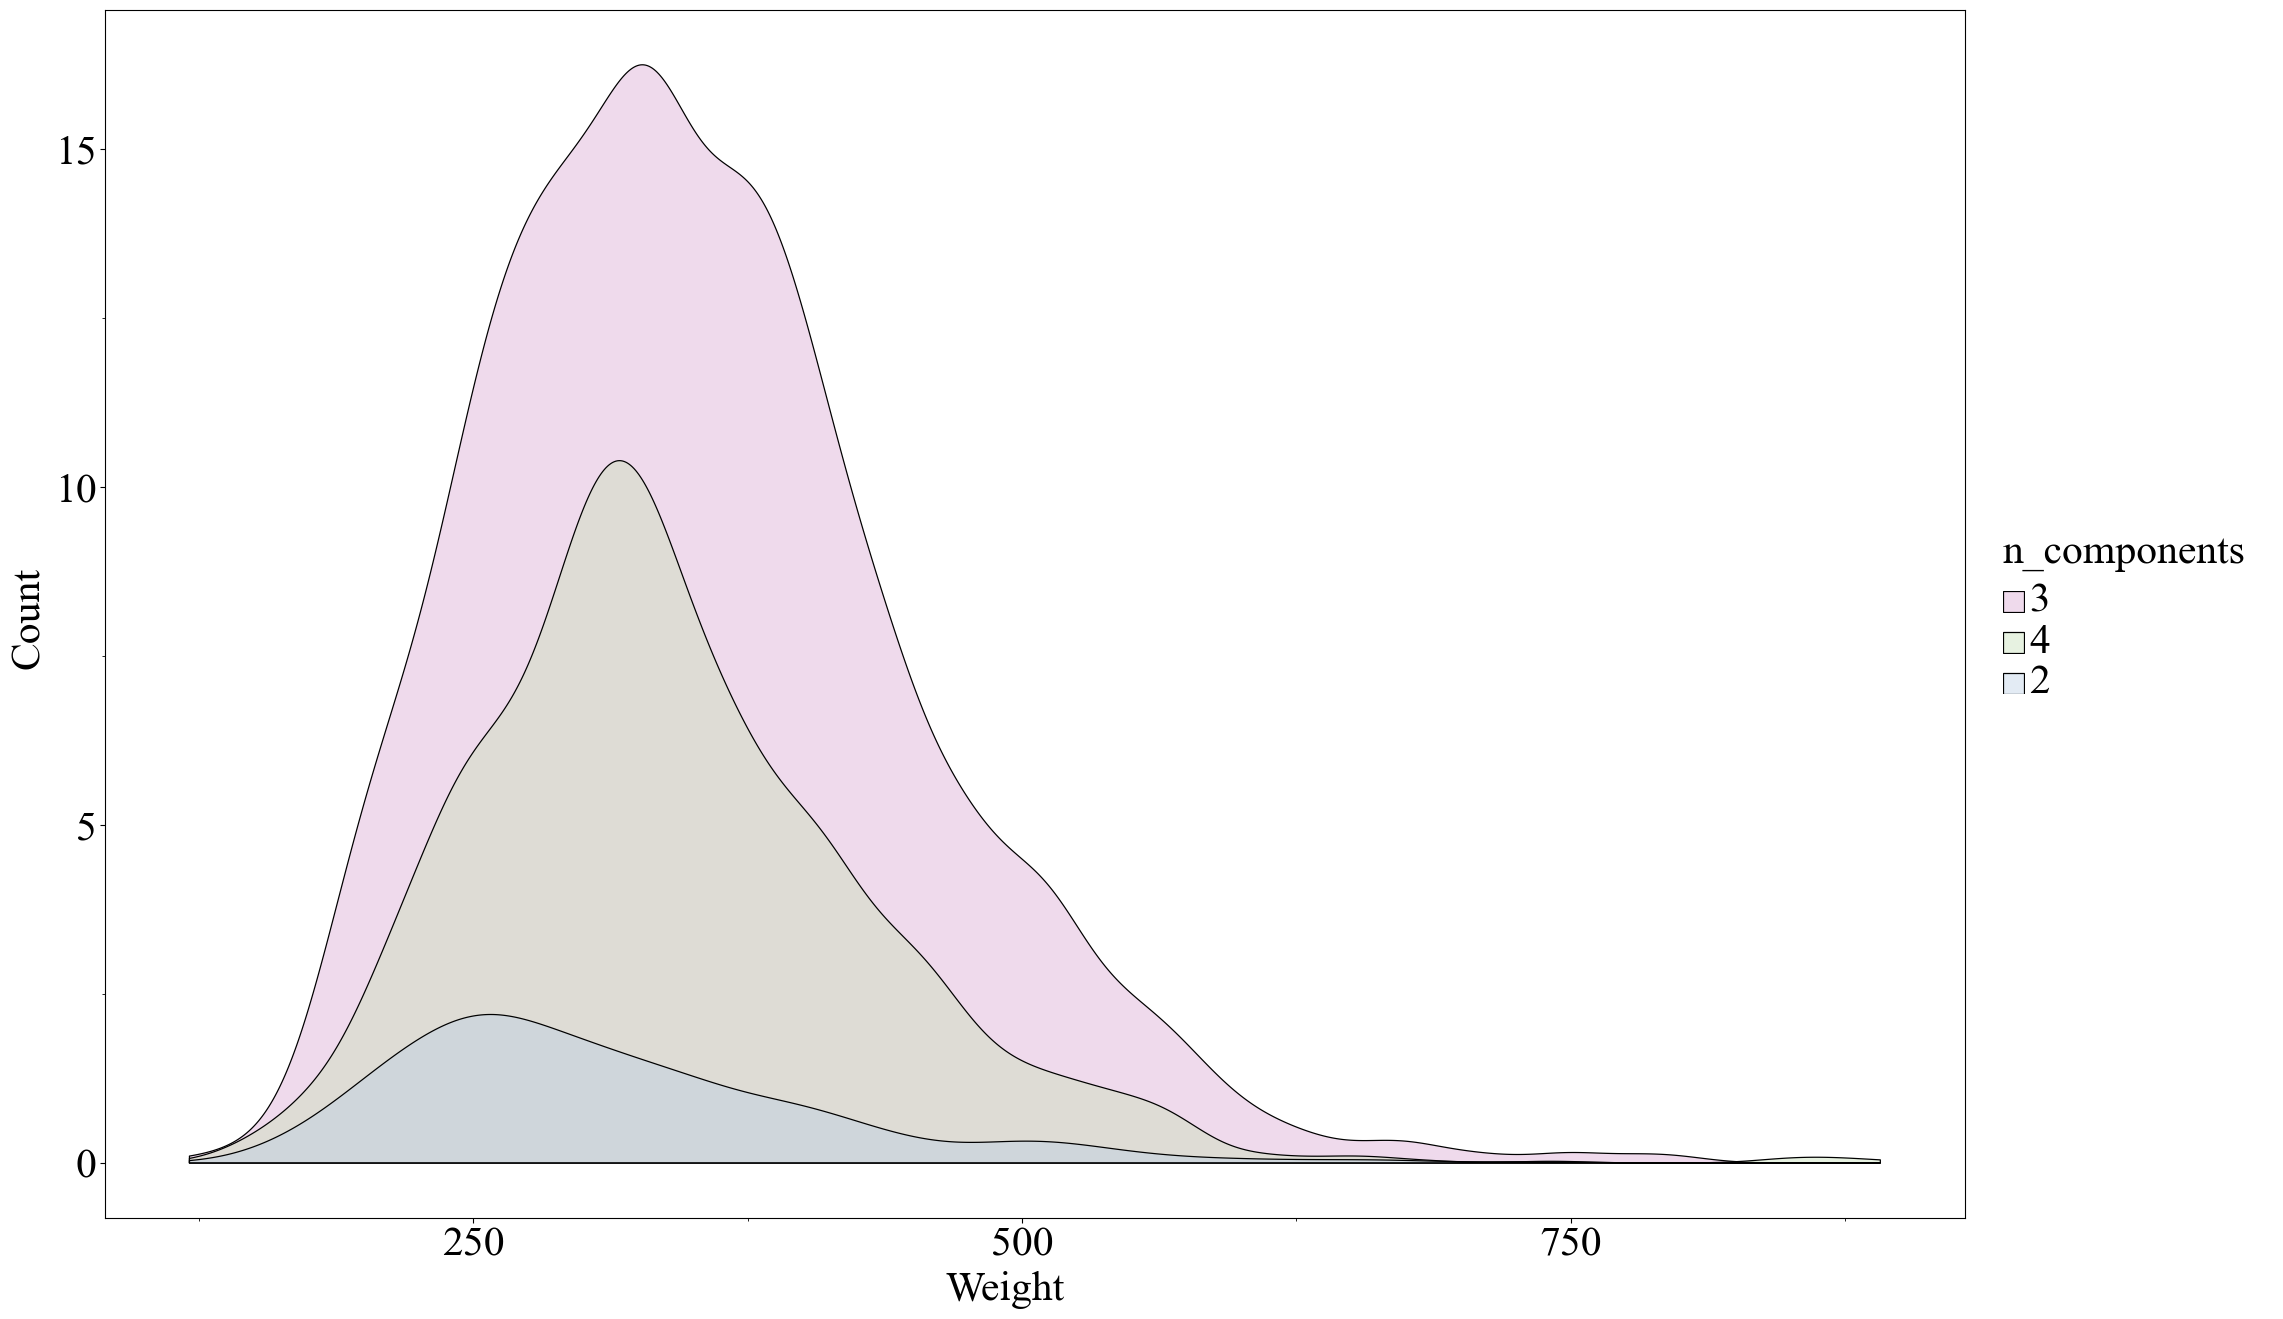

/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 24 x 16 in image.
/home/seeyou/anaconda3/envs/rdkit/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: imgs/density_n_components.pdf


In [12]:
import numpy as np
colors = np.array(["#D9A3D0", "#C5E0B4", "#B9CDE5"])
density_plot = (ggplot(data, aes(x="weight", fill="n_components"))
                + xlab("Weight")
                + ylab("Count")
                + geom_density(aes(y=after_stat('count')), alpha=0.4)
                + scale_color_brewer()
                + guides(color = guide_legend(title='n components'))
                + scale_fill_manual(values = colors)
                + theme_matplotlib()
                + theme(
                    figure_size=(24, 16),
                    legend_title = element_text(size=30), 
                    text = element_text(size=30,family='times new roman')))
print(density_plot)
density_plot.save(IMG_DIR / 'density_n_components.pdf')

Figure(432x288)


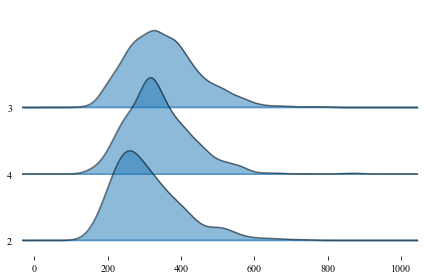

In [13]:
import joypy
fig, axes = joypy.joyplot(data,column=['weight'] ,by=['n_components'], alpha=0.5)
print(fig)

In [14]:
data

,weight,n_components,n_components_plus
0,204.191,4,3
1,218.218,4,3
2,232.245,4,3
3,246.272,4,3
4,260.299,4,3
...,...,...,...
6170,371.815,3,3
6171,387.814,3,3
6172,393.821,3,3
6173,456.920,3,3
